In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import ast

In [ ]:
df = pd.read_csv("/Users/seanlavi/dev/Schizophrenic_Speech/data/morphological_yap_features.csv", index_col=False)
df = df[["question", "label", "person", "tf_idf_seg_txt", "tf_idf_tok_txt", "count_vec"]]
df.head()

In [ ]:
# Function to calculate the mean of the numeric part in each string list
def calculate_mean_from_list_string(list_string):
    try:
        parsed_list = ast.literal_eval(list_string)
        numeric_values = [float(item[1]) for item in parsed_list]
        return sum(numeric_values) / len(numeric_values) if numeric_values else None
    except (SyntaxError, ValueError):
        return None

def calculate_mean_from_count_vec(list_string):
    try:
        parsed_list = ast.literal_eval(list_string)
        numeric_values = [float(item[1]) for item in parsed_list if item[1] > 1]
        return sum(numeric_values) / len(numeric_values) if numeric_values else 0
    except (SyntaxError, ValueError):
        return None

# Apply the function to each column of interest
df['mean_tf_idf_seg_txt'] = df['tf_idf_seg_txt'].apply(calculate_mean_from_list_string)
df['mean_tf_idf_tok_txt'] = df['tf_idf_tok_txt'].apply(calculate_mean_from_list_string)
df['mean_count_vec'] = df['count_vec'].apply(calculate_mean_from_count_vec)

# Display the updated DataFrame
df.head()

In [ ]:
# Separate into two groups based on label
schizo_group = df[df['label'] == 1]
regular_group = df[df['label'] == 0]

In [ ]:
# Plotting Box Plots
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='label', y=column, data=df)
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting Histograms
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']):
    plt.subplot(1, 3, i+1)
    sns.histplot(schizo_group[column], color='red', label='Schizophrenic', kde=True, stat="density", linewidth=0)
    sns.histplot(regular_group[column], color='blue', label='Regular', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# T-Tests
t_test_results = {}
for column in ['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']:
    t_stat, p_value = ttest_ind(schizo_group[column], regular_group[column])
    t_test_results[column] = (t_stat, p_value)

# Display T-Test results
for feature, (t_stat, p_value) in t_test_results.items():
    print(f"\nT-Test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Null Hypothesis statement
    print(f"Null Hypothesis: There is no significant difference in the mean {feature} between schizophrenic and regular persons.")
    
    # Interpret results
    if p_value < 0.05:
        print("Result: Reject the null hypothesis. There is a statistically significant difference.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference.")


In [ ]:
# Prepare data for logistic regression
features = ['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']
X = df[features]
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Feature Importance via Recursive Feature Elimination
rfe = RFE(log_reg, n_features_to_select=1)
rfe.fit(X_scaled, y)

# Display Feature Ranking
feature_ranking = dict(zip(features, rfe.ranking_))
sorted_features = sorted(feature_ranking.items(), key=lambda x: x[1])
print("\nFeature Importance (RFE ranking):")
for feature, rank in sorted_features:
    print(f"{feature}: {rank}")


# Classification Report
y_pred = log_reg.predict(X_scaled)
print("\nClassification Report:")
print(classification_report(y, y_pred))

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Label')
plt.show()

In [ ]:
from scipy.stats import pointbiserialr

# Assuming 'label' is your binary target variable
y = df['label']

# Dictionary to store results
pointbiserial_results = {}

# Loop through each feature column
for column in df.columns:
    if column in {'mean_tf_idf_seg_txt', "mean_tf_idf_tok_txt", "mean_count_vec"}
        X = df[column]
        corr, p_value = pointbiserialr(y, X)
        pointbiserial_results[column] = (corr, p_value)

# Print results
for feature, (corr, p_value) in pointbiserial_results.items():
    print(f"Point-Biserial Correlation for {feature}: Corr={corr:.4f}, P-value={p_value}")


In [23]:
# Separate into two groups based on label
schizo_group = df[df['label'] == 1]
regular_group = df[df['label'] == 0]

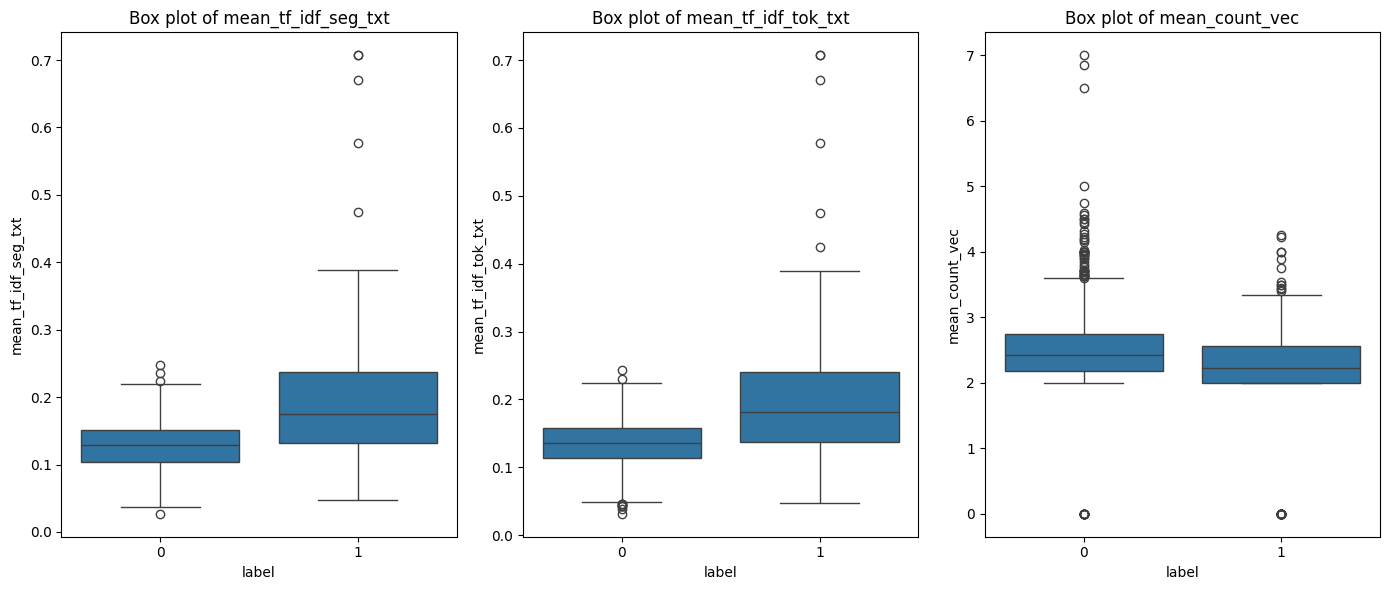

In [24]:
# Plotting Box Plots
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='label', y=column, data=df)
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

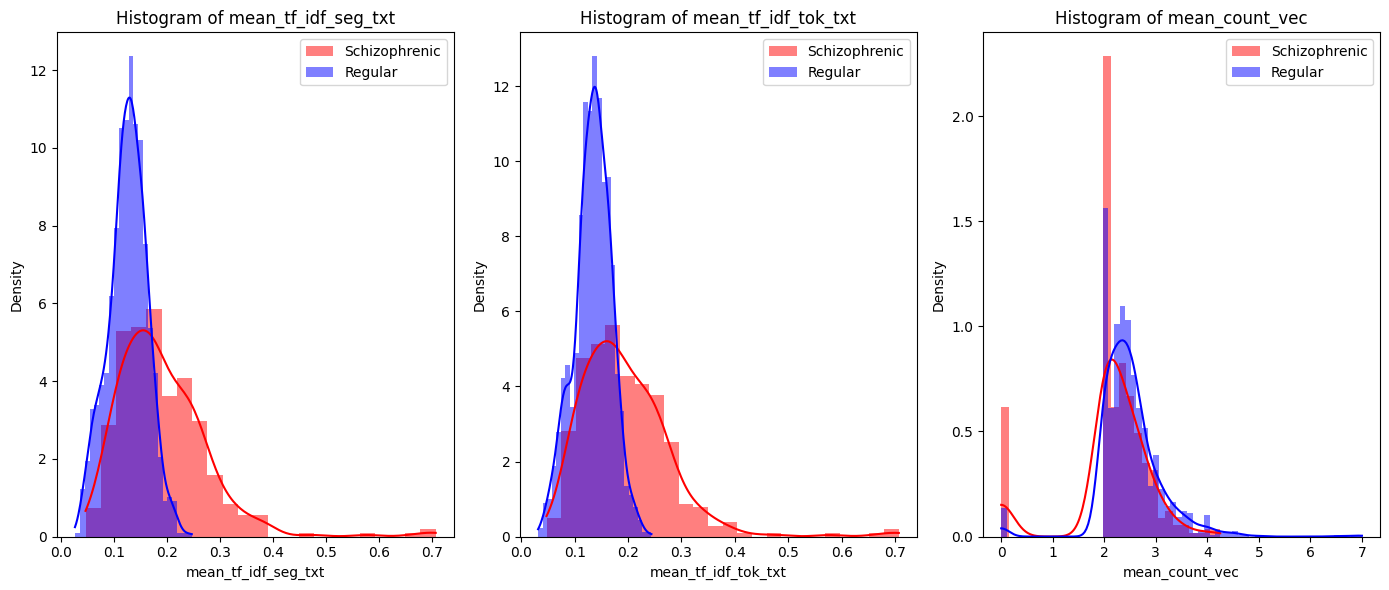

In [25]:
# Plotting Histograms
plt.figure(figsize=(14, 6))
for i, column in enumerate(['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']):
    plt.subplot(1, 3, i+1)
    sns.histplot(schizo_group[column], color='red', label='Schizophrenic', kde=True, stat="density", linewidth=0)
    sns.histplot(regular_group[column], color='blue', label='Regular', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


In [33]:
# T-Tests
t_test_results = {}
for column in ['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']:
    t_stat, p_value = ttest_ind(schizo_group[column], regular_group[column])
    t_test_results[column] = (t_stat, p_value)

# Display T-Test results
for feature, (t_stat, p_value) in t_test_results.items():
    print(f"\nT-Test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    
    # Null Hypothesis statement
    print(f"Null Hypothesis: There is no significant difference in the mean {feature} between schizophrenic and regular persons.")
    
    # Interpret results
    if p_value < 0.05:
        print("Result: Reject the null hypothesis. There is a statistically significant difference.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference.")



T-Test for mean_tf_idf_seg_txt:
T-statistic: 19.9379, P-value: 0.0000
Null Hypothesis: There is no significant difference in the mean mean_tf_idf_seg_txt between schizophrenic and regular persons.
Result: Reject the null hypothesis. There is a statistically significant difference.

T-Test for mean_tf_idf_tok_txt:
T-statistic: 19.0768, P-value: 0.0000
Null Hypothesis: There is no significant difference in the mean mean_tf_idf_tok_txt between schizophrenic and regular persons.
Result: Reject the null hypothesis. There is a statistically significant difference.

T-Test for mean_count_vec:
T-statistic: -8.6200, P-value: 0.0000
Null Hypothesis: There is no significant difference in the mean mean_count_vec between schizophrenic and regular persons.
Result: Reject the null hypothesis. There is a statistically significant difference.


In [29]:
# Prepare data for logistic regression
features = ['mean_tf_idf_seg_txt', 'mean_tf_idf_tok_txt', 'mean_count_vec']
X = df[features]
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Feature Importance via Recursive Feature Elimination
rfe = RFE(log_reg, n_features_to_select=1)
rfe.fit(X_scaled, y)

# Display Feature Ranking
feature_ranking = dict(zip(features, rfe.ranking_))
sorted_features = sorted(feature_ranking.items(), key=lambda x: x[1])
print("\nFeature Importance (RFE ranking):")
for feature, rank in sorted_features:
    print(f"{feature}: {rank}")


# Classification Report
y_pred = log_reg.predict(X_scaled)
print("\nClassification Report:")
print(classification_report(y, y_pred))


Feature Importance (RFE ranking):
mean_tf_idf_seg_txt: 1
mean_tf_idf_tok_txt: 2
mean_count_vec: 3

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1058
           1       0.85      0.42      0.56       375

    accuracy                           0.83      1433
   macro avg       0.84      0.70      0.73      1433
weighted avg       0.83      0.83      0.81      1433



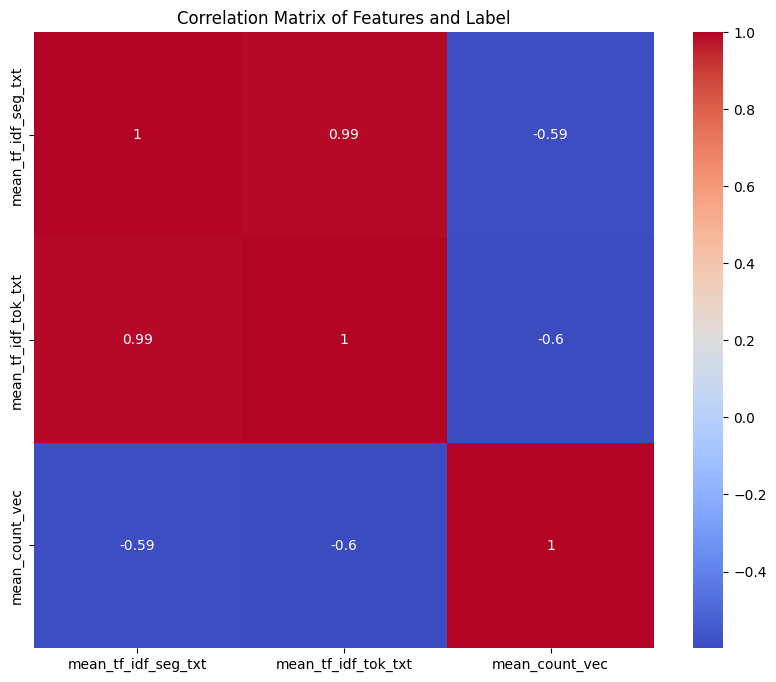

In [31]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Label')
plt.show()

In [38]:
from scipy.stats import pointbiserialr

# Assuming 'label' is your binary target variable
y = df['label']

# Dictionary to store results
pointbiserial_results = {}

# Loop through each feature column
for column in df.columns:
    if column in {'mean_tf_idf_seg_txt', "mean_tf_idf_tok_txt", "mean_count_vec"}
        X = df[column]
        corr, p_value = pointbiserialr(y, X)
        pointbiserial_results[column] = (corr, p_value)

# Print results
for feature, (corr, p_value) in pointbiserial_results.items():
    print(f"Point-Biserial Correlation for {feature}: Corr={corr:.4f}, P-value={p_value}")


SyntaxError: invalid syntax (2559881328.py, line 11)